[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//sotirischatzimiltis/MscThesis/blob/main/TraditionalML/traditionalML.ipynb)

# Import Packages

In [1]:
!pip install scikit-learn==0.23.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import seaborn as sn

# Dataset

In [3]:
train_Dataset = 'train_binary.csv'
test_Dataset = 'test_binary.csv'

# Prepare Data

In [4]:
traindata = pd.read_csv(train_Dataset)
testdata = pd.read_csv(test_Dataset)

In [5]:
traindata.head()
y_train = traindata['Traffic_type']
x_train = traindata.drop('Traffic_type',axis=1)
y_test = testdata['Traffic_type']
x_test = testdata.drop('Traffic_type',axis=1)

In [6]:
print(x_train)

        Duration     Src_bytes     Dst_bytes  Land  Wrong_fragment  Urgent  \
0       0.000000  3.558064e-07  0.000000e+00     0             0.0     0.0   
1       0.000000  1.057999e-07  0.000000e+00     0             0.0     0.0   
2       0.000000  0.000000e+00  0.000000e+00     0             0.0     0.0   
3       0.000000  1.681203e-07  6.223962e-06     0             0.0     0.0   
4       0.000000  1.442067e-07  3.206260e-07     0             0.0     0.0   
...          ...           ...           ...   ...             ...     ...   
125968  0.000000  0.000000e+00  0.000000e+00     0             0.0     0.0   
125969  0.000186  7.608895e-08  1.106923e-07     0             0.0     0.0   
125970  0.000000  1.616709e-06  2.931438e-07     0             0.0     0.0   
125971  0.000000  0.000000e+00  0.000000e+00     0             0.0     0.0   
125972  0.000000  1.094232e-07  0.000000e+00     0             0.0     0.0   

        Hot  Num_failed_logins  Logged_in  Num_compromised  ...

# Decesion Tree model

In [7]:
parameters = {'splitter': ['best','random'],
              'min_samples_leaf': [1,2],
              'max_features':["auto","sqrt","log2"]
              }

In [8]:
grid_DT = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = parameters, cv = 2, n_jobs=-1,verbose=2)
grid_DT.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_DT.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_DT.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_DT.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.5s finished


 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_features='sqrt', splitter='random')

 The best score across ALL searched params:
 0.9962134771513684

 The best parameters across ALL searched params:
 {'max_features': 'sqrt', 'min_samples_leaf': 1, 'splitter': 'random'}


In [9]:
clf_dt = DecisionTreeClassifier(**grid_DT.best_params_) # create decision tree classifier
clf_dt = clf_dt.fit(x_train,y_train) # train DT classifier
y_pred = clf_dt.predict(x_test) # predict the response for the test dataset

tn 9362
fp 349
fn 4185
tp 8648
Total correctly classified instances: 18010/22544
Test Set Accuracy: 79.89%
False alarm rate: 3.59%
Accuracy: 79.89%
Detection rate: 67.39%
Precision: 96.12%
Recall: 67.39%
F1-score: 79.23%
False positive rate: 3.88%
False negative rate: 30.89%


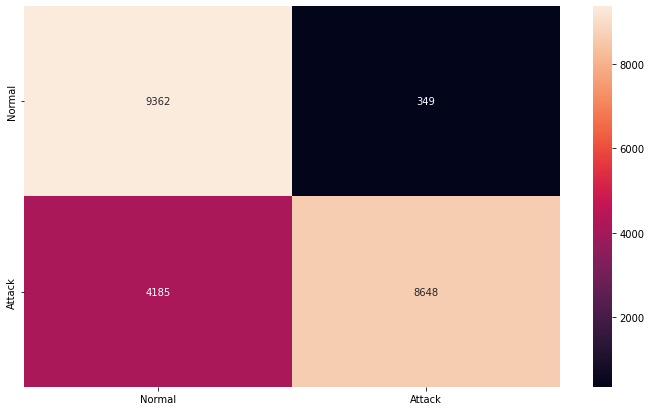

In [10]:
correct =(y_pred==y_test).sum()
total = len(y_pred)
# constant for classes
classes = ('Normal', 'Attack')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)
# rows is the truth , columns is the predicted 
# plot confusion matrix with actual numbers
df_cm= pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])


plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt ='g')

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))

print(f"Total correctly classified instances: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")
print(f"False alarm rate: {100*(fp/(fp+tn)):.2f}%")
print(f"Accuracy: {100*((tp+tn)/(tp+fp+fn+tn)):.2f}%")
print(f"Detection rate: {100 *(tp/(tp+fn)):.2f}%")
print(f"Precision: {100 * precision:.2f}%")
print(f"Recall: {100 * recall:.2f}%")
print(f"F1-score: {100 *((2*precision*recall)/(precision+recall)):.2f}%")
print(f"False positive rate: {100*(fp/(fp+tp)):.2f}%")
print(f"False negative rate: {100*(fn/(fn+tn)):.2f}%")

# Random Forest Model

In [11]:
parameters = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [100, 110, 120]
}

In [12]:
grid_RF = GridSearchCV(estimator=RandomForestClassifier(), param_grid = parameters, cv = 2, n_jobs=-1,verbose =10)
grid_RF.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RF.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RF.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RF.best_params_)

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.9min


KeyboardInterrupt: ignored

In [13]:
clf_rf = RandomForestClassifier(**grid_RF.best_params_)
clf_rf = clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)

AttributeError: ignored

In [ ]:
correct =(y_pred==y_test).sum()
total = len(y_pred)
# constant for classes
classes = ('Normal', 'Attack')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)
# rows is the truth , columns is the predicted 
# plot confusion matrix with actual numbers
df_cm= pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])


plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt ='g')

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))

print(f"Total correctly classified instances: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")
print(f"False alarm rate: {100*(fp/(fp+tn)):.2f}%")
print(f"Accuracy: {100*((tp+tn)/(tp+fp+fn+tn)):.2f}%")
print(f"Detection rate: {100 *(tp/(tp+fn)):.2f}%")
print(f"Precision: {100 * precision:.2f}%")
print(f"Recall: {100 * recall:.2f}%")
print(f"F1-score: {100 *((2*precision*recall)/(precision+recall)):.2f}%")
print(f"False positive rate: {100*(fp/(fp+tp)):.2f}%")
print(f"False negative rate: {100*(fn/(fn+tn)):.2f}%")

# MLP Classifier Model

In [14]:
parameters = {
 'activation': ['identity', 'logistic', 'tanh', 'relu'],
  'solver': ['lbfgs','sgd','adam'],
  'learning_rate' : ['constant','invscaling','adaptive'],
  'hidden_layer_sizes':[(100,),(100,100,),(1000,),(1000,1000,)]
 }

In [15]:
grid_MLP = GridSearchCV(estimator=MLPClassifier(), param_grid = parameters, cv = 2, n_jobs=-1,verbose =5)
grid_MLP.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_MLP.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_MLP.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_MLP.best_params_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
clf_mlp = MLPClassifier(**grid_MLP.best_params_)
clf_mlp = clf_mlp.fit(x_train,y_train)
y_pred = clf_mlp.predict(x_test)

In [ ]:
correct =(y_pred==y_test).sum()
total = len(y_pred)
# constant for classes
classes = ('Normal', 'Attack')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)
# rows is the truth , columns is the predicted 
# plot confusion matrix with actual numbers
df_cm= pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])


plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt ='g')

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))

print(f"Total correctly classified instances: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")
print(f"False alarm rate: {100*(fp/(fp+tn)):.2f}%")
print(f"Accuracy: {100*((tp+tn)/(tp+fp+fn+tn)):.2f}%")
print(f"Detection rate: {100 *(tp/(tp+fn)):.2f}%")
print(f"Precision: {100 * precision:.2f}%")
print(f"Recall: {100 * recall:.2f}%")
print(f"F1-score: {100 *((2*precision*recall)/(precision+recall)):.2f}%")
print(f"False positive rate: {100*(fp/(fp+tp)):.2f}%")
print(f"False negative rate: {100*(fn/(fn+tn)):.2f}%")

# Gradient Boosting Classifier

In [16]:
parameters = {'learning_rate': [0.1,0.05,0.01,0.001],
              'subsample'    : [0.9, 0.5, 0.2, 1],
              'n_estimators' : [100,500,1000,1500],
              'max_depth'    : [3,4,6,8]
              }

In [17]:
grid_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = parameters, cv = 2, n_jobs=-1,verbose =5)
grid_GBC.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

Fitting 2 folds for each of 256 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
clf_gbc = GradientBoostingClassifier()
clf_gbc = clf_gbc.fit(x_train,y_train)
y_pred = clf_gbc.predict(x_test)

In [ ]:
correct =(y_pred==y_test).sum()
total = len(y_pred)
# constant for classes
classes = ('Normal', 'Attack')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)
# rows is the truth , columns is the predicted 
# plot confusion matrix with actual numbers
df_cm= pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])


plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt ='g')

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))

print(f"Total correctly classified instances: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")
print(f"False alarm rate: {100*(fp/(fp+tn)):.2f}%")
print(f"Accuracy: {100*((tp+tn)/(tp+fp+fn+tn)):.2f}%")
print(f"Detection rate: {100 *(tp/(tp+fn)):.2f}%")
print(f"Precision: {100 * precision:.2f}%")
print(f"Recall: {100 * recall:.2f}%")
print(f"F1-score: {100 *((2*precision*recall)/(precision+recall)):.2f}%")
print(f"False positive rate: {100*(fp/(fp+tp)):.2f}%")
print(f"False negative rate: {100*(fn/(fn+tn)):.2f}%")

# K-Nearest Neighbors

In [18]:
parameters = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

In [ ]:
grid_KNN = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = parameters, cv = 2, n_jobs=-1,verbose =5)
grid_KNN.fit(x_train,y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_KNN.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_KNN.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_KNN.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
clf_knn = KNeighborsClassifier()
clf_knn = clf_knn.fit(x_train,y_train)
y_pred = clf_knn.predict(x_test)

In [ ]:
correct =(y_pred==y_test).sum()
total = len(y_pred)
# constant for classes
classes = ('Normal', 'Attack')

# Build confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)
# rows is the truth , columns is the predicted 
# plot confusion matrix with actual numbers
df_cm= pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])


plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt ='g')

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))

print(f"Total correctly classified instances: {correct}/{total}")
print(f"Test Set Accuracy: {100 * correct / total:.2f}%")
print(f"False alarm rate: {100*(fp/(fp+tn)):.2f}%")
print(f"Accuracy: {100*((tp+tn)/(tp+fp+fn+tn)):.2f}%")
print(f"Detection rate: {100 *(tp/(tp+fn)):.2f}%")
print(f"Precision: {100 * precision:.2f}%")
print(f"Recall: {100 * recall:.2f}%")
print(f"F1-score: {100 *((2*precision*recall)/(precision+recall)):.2f}%")
print(f"False positive rate: {100*(fp/(fp+tp)):.2f}%")
print(f"False negative rate: {100*(fn/(fn+tn)):.2f}%")